# Численные методы

## Вычислительная сложность (сomputational complexity)

In [12]:
import numpy as np
a = np.array([0,1,1])
y = np.array([0,1,3])
(a - y) @ (a - y)

4

In [14]:
(a-y) @ (a-y)

4

In [9]:
a - y 

array([ 0, -1,  1])

In [8]:
import numpy as np 

a = np.array([1,2,3])
b = np.matrix([[1,1,1,1,1],
             [2,2,2,2,2],
             [3,4,5,6,7]])
b @ b.T

matrix([[  5,  10,  25],
        [ 10,  20,  50],
        [ 25,  50, 135]])

In [ ]:
def foo(elements):
    n = len(elements) # 2операции: присвоение + len()
    for i in range(n): # 1 операция range() + n операций: next(i)
        elements[i] += 1 # 3 операции: i < len(elements), присвоение + сложение
# Итого: 4n + 3 


- Если __$T(n) = 4n + 3$__, асимптотическое время работы __$T(n) ~ n$__, => У алгоритма линейная сложность.  
- Если __$T(n) = 5n^2+3n-1$__ асимптотическое время работы __$T(n) ~ n^2$__ => У алгоритма квадратичная сложность 
- Если __$T(n) = 10n^3-5n^2+3n+5$__ асимптотическое время работы __$T(n) ~ n^3$__ => У алгоритма кубическая сложность
- Если __$T(n) = 10$__ У асимптотическое время работы __$T(n)~1$__ => У алгоритма константная сложность

Задача обучения линейной регрессии:   
$w = arg*min*MSE(Xw,y)$   
$w = (X^TX)^{-1}X^Ty$

## Итеративные методы 

### Метод биссекции   
Необходимо соблюсти 2 условия: 
1. Функция непрерывна (например $f(x)=0$)
2. У значений на концах: разные знаки.

In [9]:
def foo(x):
    return x**3-x**2+x-5

In [19]:
def bissec(func, start, end, error=0.000000001):
    if abs(start - end) < error:
        return start
    middle = (start+end)/2
    if (func(start) < 0 and func(middle) > 0) or (func(start) > 0 and func(middle) < 0):
        return bissec(func, start, middle)
    else: 
        return bissec(func, middle, end)

bissec(foo, 0, 3)


1.8812394007109106

### Градиентный спуск

- Для линейной регрессии с функцией потерь MSE он работает быстрее на больших наборах данных.
- Градиентный спуск годится для линейной регрессии и с другими функциями потерь (не для всех есть формулы).
- Он применим в обучении нейронных сетей, для которых тоже нет прямой формулы.

### Вычисление производных с помощью sympy

In [5]:
import sympy as sp 

x, y = sp.symbols('x y')
f = x**2*y + x*y**2 
df_dx = sp.diff(f,x)
df_dy = sp.diff(f,y)


In [12]:
x,y = sp.symbols('x y')
f = (x + y - 1)**2 + (x - y - 2)**2
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
df = sp.Matrix([f]).jacobian([x, y])
df

Matrix([[4*x - 6, 4*y + 2]])

### Минимизация функции потерь

Функция потерь $L(y, a)$  
- `L` (lost)
- `y` - правильные ответы
- `a` - предсказания  
  
Задачу обучения через минимизацию функции потерь запишем:  
$w = arg * min * L(y,a)$

$$
f(x)=
\begin{cases}
1/d_{ij} & \quad \text{when $d_{ij} \leq 160$}\\ 
0 & \quad \text{otherwise}
\end{cases}
$$

$$log_{10}a_i \quad \text{if $a_i$ = 0}$$

Квадратичная функция потерь MSE:   

$$L(y,a) = \sum_{i=1}^{n} (a_i-y_i)^2$$  

Абсолютная функция потерь MAE:  

$$L(y,a) = \sum_{i=1}^{n} |a_i-y_i|$$

Логическая функция потерь (logistic loss function)

$$
L(y,a) = - \sum_{i=1}^{n}\begin{cases} 
log_{10}a_i \quad \text{when $y_i$ = 1}\\
log_{10}(1-a_i) \quad \text{when $y_i$ = 0}
\end{cases}
$$
$a_i$ - вероятность класса 1 для объекта с индексом i. В отличие от accuracy - имеет производную


In [32]:
from math import log10
y = [0, 0, 1, 1, 0]
a = [0.2, 0.4, 0.6, 0.8, 0.1]

def llf(lst_y, lst_a):
    return sum([-log10(a) if y == 1 else -log10(1-a) for y,a in zip(lst_y, lst_a)])

llf(y,a)

0.6832750158095007

### Градиент функции
Минимум функции потерь не всегда можно найти вручную. Разобраться, в каком он направлении, поможет градиент функции (фнгл. function gradient).    
Градиент векторной функции - это вектор, состоящий из производных ответа по каждому аргументу.  
$\nabla$ - оператор набла   
Градиент функции f от n-меррного вектора x вычисляется так:   


$$\nabla f(x) = (\dfrac{\delta f}{\delta x_1},\dfrac{\delta f}{\delta x_2},...,\dfrac{\delta f}{\delta x_n})$$

где $\delta f / \delta x_i$ - Производная функции $f$ по аргументу $x_i$  
Градиент функции от одного аргумента - это производная:  
$$f(x) = (x - 5)^2$$
$$\nabla f(x) = \nabla (x^2-10x+25)=2x-10$$   

Найдём градиент функции с тремя аргументами 
$$f(x,y,z) = x^2 + 2y^2 + 10yz - 5z$$ 
Рассчитаем производные по x,y,z:
$$\dfrac{\delta f(x,y,z)}{\delta x} = \dfrac{\delta (x^2)}{\delta x} + \dfrac{\delta (2y^2)}{\delta x} + \dfrac{\delta (10yz)}{\delta x} - \dfrac{\delta (5z)}{\delta x} = 2x + 0 + 0 + 0 $$
$$\dfrac{\delta f(y,y,z)}{\delta y} = 0 + 4y + 10z + 0$$ 
$$\dfrac{\delta f(y,y,z)}{\delta z} = 0 + 0 + 10y -5$$ 
Получаем трёхмерный вектор из производных: 
$$\nabla f(x,y,z) = (2x,4y+10z, 10y-5)$$

Градиент показывает направление самого быстрого роста функции. Но для задачи минимизации это не подходит. Нам нужен противоположный вектор - направление наискорейшего убывания, то есть антиградиент....
$$\nabla f(x)$$

**Градиентный спуск** - итеративный алгоритм поиска минимума функции потерь. Он движеться по направлению антиградиента и постепенно приближаеться к минимуму: 
$$x^1 = x^0 - \mu * \nabla f (x^0)$$
значение $x^0$ - начальная точка, от которой начинаем искать
значение $\mu$ контролирует размер шагов градиентного спуска
$$x^t = x^{t-1} - \mu * \nabla f(x^{t-1})$$
**Обрати внимание что используеться градиент, а не антиградиент!!!**

$$ -2(x - 10)$$ 
$$ -2x + 20$$ 


In [40]:
def foo(x):
    return -2 * x + 20

In [60]:
x_0 = 0 
mu = 0.4 

x_1 = x_0 + mu * foo(x_0)
print(f'{x_1 = }')
x_2 = x_1 + mu * foo(x_1)
print(f'{x_2 = }')
x_3 = x_2 + mu * foo(x_2)
print(f'{x_3 = }')
x_4 = x_3 + mu * foo(x_3)
print(f'{x_4 = }')
foo(x_4)

x_1 = 8.0
x_2 = 9.6
x_3 = 9.92
x_4 = 9.984


0.03200000000000003

## Градиентный спуск для линейной регрессии

Обучение линейной регрессии
$$w = arg * \min_{w} * MSE(X_w,y)$$

Функция потерь в векторном виде: 
$$ MSE(y,a) = \dfrac{1}{n}\sum_{i=1}^{n}(a_i-y_i)^2 = \dfrac{1}{n}(a-y,a-y)$$
$y$ - вектор правильного ответа  
$a$ - вектор предсказаная

Преобразуем скалярное произведение в матричное:  
$$(a-y,a-y) = (a-y)^T(a-y)$$

Объединяем формулу MSE и линейной регрессии
$$MSE(X_w,y) = \dfrac{1}{n}(X_w-y)^T(X_w-y)$$

Найдем градиент функции по вектору параметров $w$. **Градиенты векторных функций** вычисляються как и производные. Например когда работаем с числами, производная (xw-y)^2 по вектору параметров $w$ равна $2x(xw-y)$. Когда с векторами - от содержимого первой скобки остаётся только множитель при $w$, то есть $X^T$:
$$ \nabla MSE(X_w, y) = \dfrac{2}{n}X^T(X_w - y)$$

### Стохастический градиентный спуск SGD

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


data_train = pd.read_csv('train_data_n.csv')
features_train = data_train.drop(['target'], axis=1)
target_train = data_train['target']

data_test = pd.read_csv('test_data_n.csv')
features_test = data_test.drop(['target'], axis=1)
target_test = data_test['target']


In [24]:
class SGDLinearRegression:
    def __init__(self, step_size, epochs, batch_size):
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)        
        y = train_target
        w = np.zeros(X.shape[1]) 
        
        for _ in range(self.epochs):
            batches_count = X.shape[0] // self.batch_size
            for i in range(batches_count):
                begin = i * self.batch_size # 0 | 1000
                end = (i + 1) * self.batch_size # 10 | 1010
                X_batch = X[begin:end, :]
                y_batch = y[begin:end]
                
                gradient = (2 / self.batch_size) * X_batch.T.dot(X_batch.dot(w) - y_batch) 
                gradient.shape # (101,) 
                w -= self.step_size * gradient # 0.01 * (101,)

        self.w = w[1:]
        self.w0 = w[0]
        self.batches_count = batches_count
        
        
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    

model = SGDLinearRegression(0.015, 10, 100)
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)
print(r2_score(target_train, pred_train).round(5))
print(r2_score(target_test, pred_test).round(5))

### Регуляризация линейной регрессии


Уменьшить переобучение поможет регуляризация. Она "штрафует" модель, если значениия параметров усложняют работу алгоритма. У моделей линейной регрессии регуляризация выражается в ограничении весов.  

Чтобы понять насколько веса велики, вычисляют расстояние от вектора весов до вектора, состоящего из нулей. Например квадрат евклидова расстояния $d_2(w,0)$ равен скалярному произведению весов на себя: $(w,w)$.

Чтобы ограничить значения весов, добавим скалярное произведение весов на себя в формулу  функции потерь:  
$$L(w) = MSE(Xw, y) + (w,w)$$
Производная $(w,w)$ равна $2w$ Градиент функции потерь вычисляеться так:
$$\nabla L(w) = \dfrac{2}{n}X^T(Xw-y)+2w$$

Чтоы контролировать силу регуляризации, в формулу функции потерь добавляют вес регуляризации (_regularization weight_) $\lambda$
$$\nabla L(w) = MSE(Xw, y) + \lambda(w,w)$$

Вес регуляризации добавляется также в формулу вычисления градиента: 
$$\nabla L(w) = \dfrac{2}{n}X^T(Xw-y)+2 \lambda w$$

Если для регуляризации весов применяется евклидово расстояние, то такая линейная регрессия называется гребневой регрессией (**ridge regression**).


### Основы нейронных сетей 

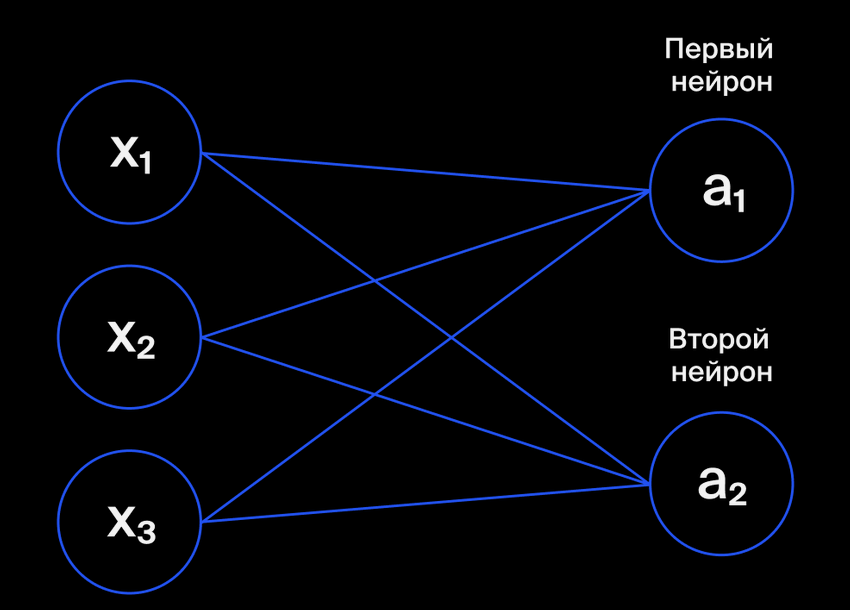

- $x_1, x_2, x_3$ - значения на входе  
- $a_1, a_2$ - значения на выходе, вычисляються также как и предсказания линейной регрессии $a_1 = xw_1$
- У каждого значения на выходе: свои веса $w_1, w_2$

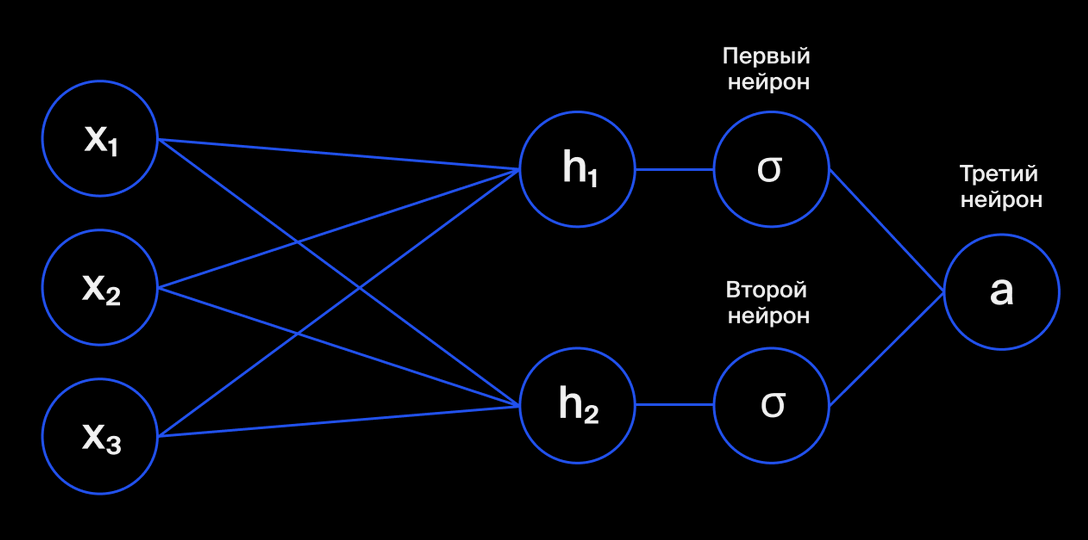

Тут $h_1, h_2$ - промежуточные переменные

Значения $h_1, h_2$ передаются в ф-цию $$\sigma (x) = \dfrac{1}{1+e^{-x}}$$
Логистическая функция в нейронной сети - это функция активации (activation function)
- Промежуточная переменная ($h_1, h_2$) - это произведение значения входа на вес: $h_1 = xw_1$ | $h_2 = xw_2$
- Предсказания по нейронной сети вычисляются по формуле($h_1,h_2...$ обозначим вектором $h$ для удобства): 
$$ a = \sigma (h) w_3 $$

Если в матрицы записать веса нескольких нейронов, можно получить еще более сложную сеть, например, такую:

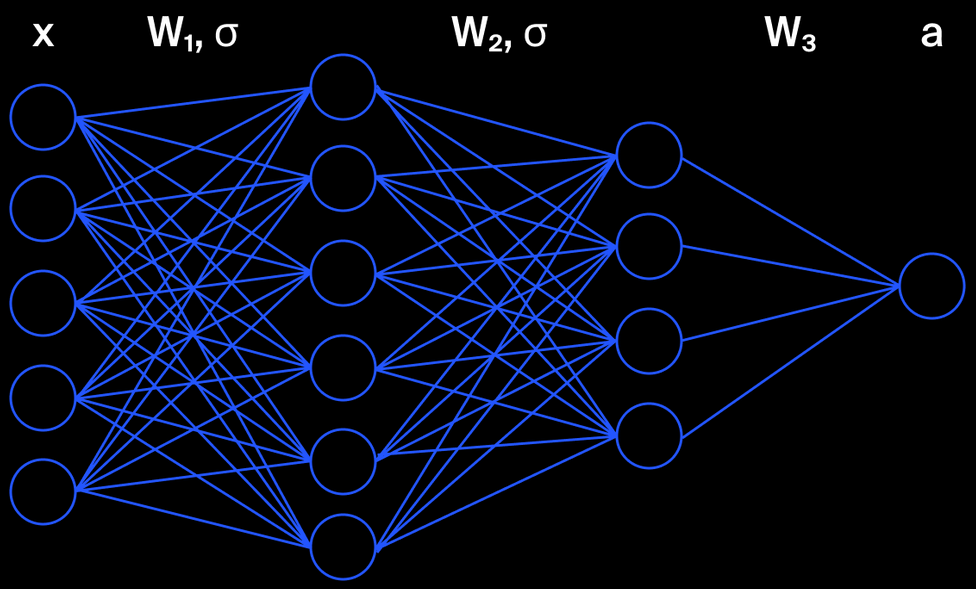
ГДЕ:
- $x$ входной вектор размерностью $p$ (кол-во признаков)
- $W_1$ матрица размерностью $p*m$
- $W_2$ матрица размерностью $m*k$
- $W_3$ матрица размерностью $k*1$
- a - предсказание модели (одно число) 
- Когда такая нейронная сеть рассчитывает предсказания она последовательно выполняет:
  $$ a = \sigma (\sigma (xW_1)W_2)W_3$$

### Обучение нейронных сетей

Чтобы обучить нейронную сеть, нужно сформулировать задачу обучения.   
Любую нейронную сеть можно записать ф-цией от её входного вектора и параметров. Обозначим: 
- $X$ - признаки обучающей выборки
- $P$ - набор всех параметров нейронной сети 
- $N(X,P)$ - функция нейронной сети
Возьмём такую нейронную сеть:
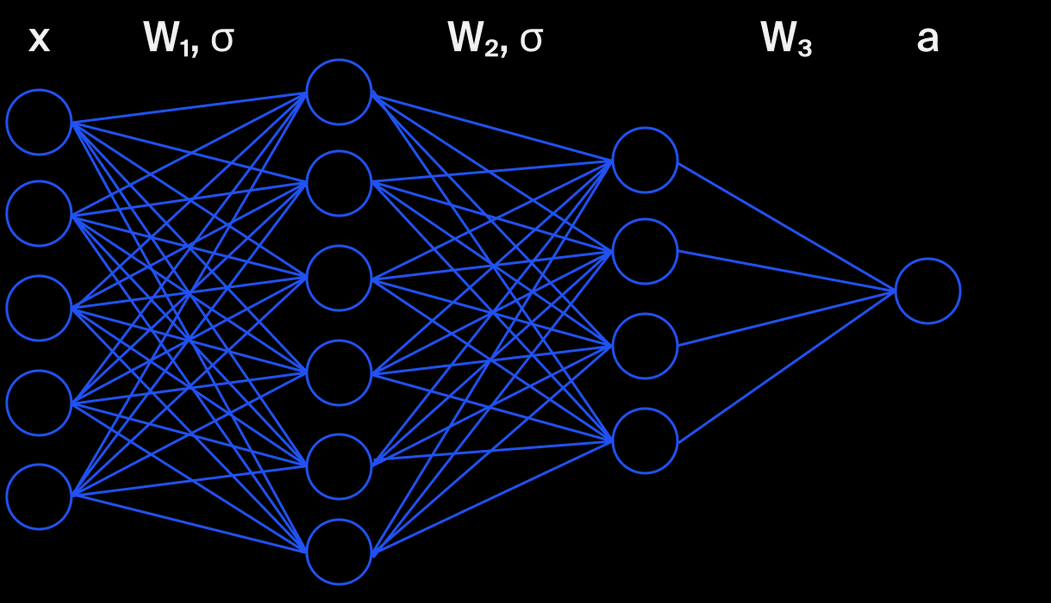

Параметры нейронной сети - это веса в нейронах:
$$ P = W_1, W_2, W_3 $$ 
Функция нейронной сети такая:
$$ N(X,P) = \sigma ( \sigma (XW_1)W_2)W_3 $$ 
Также обозначим: 
- $y$ - ответы обучающей выборки;
- $L(a,y)$ - функция потерь (например MSE)
Тогда задача обучения нейронной сети формулируется так: 
$$\min_{P} L (N(X,P),y)$$
**Минимум этой функции также находится алгоритмом SGD.**  
Алгоритм обучения нейронной сети такой же, как и влгоритм SGD для линейной регрессии. Только вместо градиента для линейной регрессии вычисляется градиент для нейронной сети: 
$$ \nabla L (N(X,P),y)$$

## Градиентный бустинг

Ансамбль - набор моделей для решения одной и той же задачи. Сила ансамлей в том, что вместе модели ошибаются в среднем не так сильно, как по отдельности.  
Пример ансамбля: **Случайный лес**
Второй подход: **Градиентный бустинг**. в нём каждая последующая модель учитывает ошибки прыдыдущей, а в финальном предсказании - прогнозы, построенные базовыми моделями. Итоговая модель будет выглядить так:
$$a_n(x) = \sum_{k=1}^{n}y_kb_k(x)$$
- $a_n(x)$ Предсказания ансамбля
- $N$ Количество базовых моделей
- $b_k(x)$ предсказания базовой модели
- $y_k$ вес модели

Пример: задача регрессии.   
Есть `n` объектов c признаками `x` и правильными ответами `y`. Задача - минимизировать ф-цию потерь MSE:
$$MSE(y,a) = \dfrac{1}{n}\sum_{i=1}^{n}(a(x_i)-y_i)^2 \rightarrow min_{a(x)}$$
Для удобства приравняем веса моделей к единице:
$$ y_k=1 \text{, для всех $k=1,...,N$}$$
Получим: 
$$ a_n(x) = \sum_{k=1}^{N}b_k(x)$$

**Создадим ансамбль последовательных моделей.**  
Сперва построим базовую модель $b_1$ решая задачу минимизации:
$$b_1 = arg \min_{b} \dfrac{1}{n} \sum_{i=1}^{n}(b(x_i) - y_i)^2$$
Получим такой ансамбль: 
$$a_1(x) = b_1(x)$$
Запишем остаток (residual) - разность между предсказаем на первом и правильными ответами:
$$e_{1,i}=y_i - b_i(x_i)$$
На втором шаге модель строим уже так:
$$b_2 = arg \min_{b} \dfrac{1}{n} \sum_{i=1}^{n}(b(x_i)-e_{1,i})^2$$
Ансамль примет такой вид:
$$a_2(x) = \sum_{k=1}^{2}b_k(x)=b_1(x)+b_2(x)$$
Вычислим остаток для каждого объекта i:
$$e_{2,i} = y_{i} - a_2(x_i) = y_i - \sum_{k=1}^{2}b_k(x_i)$$
На каждом следующем шаге алгоритм минимизирует ошибку ансамбля на предыдущем.  
Обобщим формулы. На шеге $N-1$ остаток вычислим так:
$$e_{N-1,i} = y_i - a_{N-1}(X_i)$$
Сам ансамбль представим как сумму накопленных к этому шагу предсказаний базовых моделей:
$$a_{N-1}(X) = \sum_{k=1}^{N-1}b_k(x)$$ 
Тогда на N-m шаге алгоритм подберёт модель с учётом ошибки ансамля на шаге $N-1$
$$b_n(x) = arg \min_{b} \dfrac{1}{n} \sum_{i=1}^{n}(b(x_i) - e_{N-1,i})^2$$


При объединение бустинга и градиентного спуска - получаем градиентный бустинг!
Каждая базовая модель в бустинге старается сдвинуть предсказания прошлого шага в сторону правильных ответов. Так минимизируют функцию потерь. Градиентный спуск помогает делать это эффективнее.  

К примеру: наша функция потерь L(y,a) у которой есть производная повторим формулу ансамбля:
$$a_n(x)=a_{N-1}(x) + y_nb_n(x)$$
На каждом шаге подберём ответы, которые минимизируют функцию:
$$L(y,a(x)) \rightarrow \min_{a}$$
Минимизируем функцию градиентным спуском. Для этого на каждом шаге вычислим антиградиент функции потерь по предсказанию $gN$:
$$g_n(x) = -\nabla L (y, a_{N-1}(x) + a)$$
Чтобы сдвинуть подсказания в нужную сторону, следующая базовая модель учится подсказывать gN:
$$b_{N}(x) = arg \min_{b} \dfrac{1}{n} \sum_{i=1}^{N}(b(X_i) + G_N(x_i))^2$$
Вес при bN получаем из задачи минимизации, перебирая разные числа:
$$Y_N = arg \min_{y} L(y, a_{N-1}(x) + yb_N(X))$$ 
Именно коэффициент при базовой модели помогает настоить ансамль так, чтобы получить наиболее точное предсказание.   

**Градиентный бустинг** годится для разных функций потерь, у которых есть производные. Например, средневадратичной в задаче регрессии или логарифмической в задаче бинарной классификации..

### Регуляризация градиентного бустинга

Уменьшить переобучение градиента бустинга поможет регуляризация  
Если в линейной регрессии снижали веса, то регуляризация для градиентного бустинга - это: 
- уменьшение размера шага.
- настройка параметров деревьев
- рандомизация подвыборок у базовых моделей $b_i$.
Уменьшим размер шага. Повторим формулу расчёта предсказания на шаге $N$:
$$ a_N(X) = a_{N-1}(X) + y_N b_N(X) $$ 
Если алгоритм делает слишком большие шаги, н быстро запоминает тренировочную выборку и подель переобучается...   
введём коэффициент $\eta$ который отвечает за скорость обучения (learning rate). Он уменьшит размер шага 
$$ a_N(X) = a_{N-1}(X) + \eta \times y_N b_N(X) $$ 
Значение $\eta$ подбираеться экспериментально   
Также возможна регуляризация градиентного бустинга:  
1. Настройка параметров деревьев(глубина)
2. Работа с подвыборками (алгоритм работает только с подвыборками)

### Библиотеки для градиентного бустинга

- `XGBoost` 
- `LightGBM` Работает с категориальными признаками 
- `CatBoost` (от яндекса)
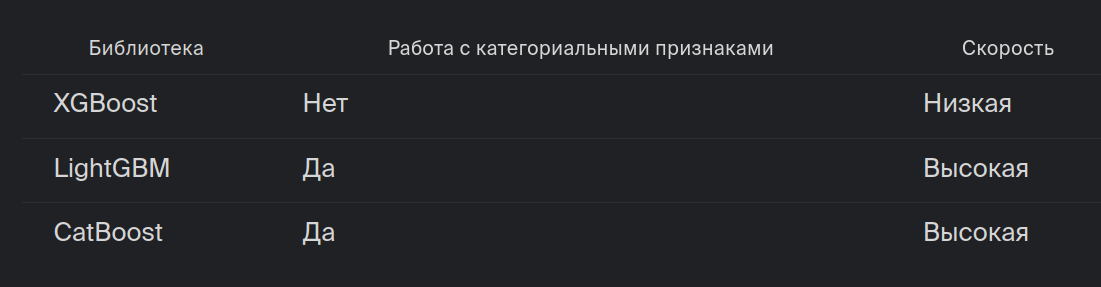